Stegnography Testing
Imperceptibility Metrics


Enter the path of the orignal image:  ./IMAGES/1024PNG.png
Enter the path of the stego image:  ./stego/PNG STEGO112.png

|   MSE |   PSNR |    SSIM |      IF |   Entropy |
|-------+--------+---------+---------+-----------|
| 0.006 | 70.212 | 0.99991 | 0.99984 |   0.00064 |
Security analysis

comparison between the histogram of Original image and the stego image


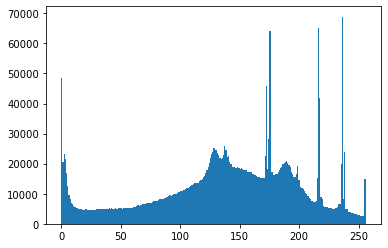

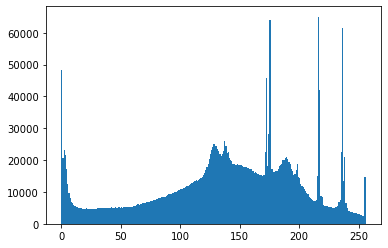

Chi-Square
|   Chi-Square |
|--------------|
|    0.0250683 |

Comparison between the Histogram of the original image and stego image in term of Mean, Varanse and standred devation
| Comparison    |          Mean |     Variance |   Standred Devation |
|---------------+---------------+--------------+---------------------|
| Orignal Image | 115.927       | 5786.71      |        76.0705      |
| Stego Image   | 115.926       | 5786.77      |        76.0708      |
| difference    |   0.000844002 |    0.0550589 |         0.000361894 |


In [11]:
from tabulate import tabulate
import cv2
import cv2
import numpy as np
from sewar import full_ref
from skimage import measure, metrics
from skimage.metrics import structural_similarity as ssim
import math
import numpy as np
from matplotlib import pyplot as plt



print('\033[1m' +"Stegnography Testing")
print('\033[1m' +"Imperceptibility Metrics")

print('')
print('')

Orignal_image = input('\033[1m' +"Enter the path of the orignal image:  ")
Orig_image = cv2.imread(Orignal_image)
Stegon_image = input('\033[1m' +"Enter the path of the stego image:  ")
Stego_image = cv2.imread(Stegon_image)

print('')
#-------------MSE-----------------------------

MSE = metrics.mean_squared_error(Orig_image,Stego_image);

#-------------PSNR-----------------------------
PSNR = metrics.peak_signal_noise_ratio(Orig_image,Stego_image, data_range=None)

#-------------SSIM-----------------------------

SSIM = ssim(Orig_image,Stego_image, data_range = Stego_image.max() - Stego_image.min(), multichannel = True)

#-------------IF-----------------------------

IF = full_ref.vifp(Orig_image,Stego_image, sigma_nsq=2)

#-------------------------Histogram------------

h, w = Orig_image.shape[:2]
tot = h * w
h, w = Stego_image.shape[:2]
tot2 = h * w

img1_hsv = cv2.cvtColor(Orig_image, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(Stego_image, cv2.COLOR_BGR2HSV)
hist1 = cv2.calcHist([img1_hsv],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2_hsv],[0],None,[256],[0,256])

#---------------------------Entropy----------
entropy = 0
bins = 0
for i in range (0,256):
        if hist1[i][0] != 0:
                entropy = entropy - (hist1[i][0]/tot)*math.log(hist1[i][0]/tot)
                bins = bins + 1
        entropy1 = 0
        bins = 0
        for i in range (0,256):
            if hist2[i][0] != 0:
                entropy1 = entropy1 - (hist2[i][0]/tot2)*math.log(hist2[i][0]/tot2)
                bins = bins + 1
        
Entor = abs(entropy-entropy1)

##-------------------------------Print results-------------------
Row = [[round(MSE,3), round(PSNR,3), round(SSIM,5), round(IF,5),round(Entor,5)]]
table = tabulate(Row, headers=['MSE', 'PSNR', 'SSIM','IF','Entropy'], tablefmt='orgtbl')

print(table)


    
#=================================================== Security analysis ===========
print('\033[1m' +"Security analysis")
print('')
print('\033[1m' +"comparison between the histogram of Original image and the stego image")

 #------------------Plot Histogram ---------------
plt.hist(Orig_image.ravel(),256,[0,256])
plt.show()
plt.hist(Stego_image.ravel(),256,[0,256])
plt.show()
    
 #------------------Chi-Square ---------------    
print('\033[1m' +"Chi-Square")
img1_hsv = cv2.cvtColor(Orig_image, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(Stego_image, cv2.COLOR_BGR2HSV)
 
# Calculate the histogram and normalize it
hist_img1 = cv2.calcHist([img1_hsv], [0,1], None, [180,256], [0,180,0,256])
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
hist_img2 = cv2.calcHist([img2_hsv], [0,1], None, [180,256], [0,180,0,256])
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
 
# find the metric value
metric_val = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_BHATTACHARYYA)
b=cv2.compareHist(hist_img1,hist_img2,cv2.HISTCMP_CHISQR)

##-------------------------------Print results-------------------
Row1 = [[b/100]]
table1 = tabulate(Row1, headers=['Chi-Square'], tablefmt='orgtbl')

print(table1)


# -----Comparison between the Histogram of the original image and stego image in term of Mean, Varanse and standred devation
print('')
print('\033[1m' +"Comparison between the Histogram of the original image and stego image in term of Mean, Varanse and standred devation")

# get mean from image
imean1 = np.mean(img1_hsv)

imean2 = np.mean(img2_hsv)



# get variance from image
# variance = mean of square of image - square of mean of image
grayf = img1_hsv.astype(np.float32)
grayf2 = grayf * grayf
imeanf2 = np.mean(grayf2)
ivar1 = imeanf2 - imean1**2
istd1 = math.sqrt(ivar1)

grayf = img2_hsv.astype(np.float32)
grayf2 = grayf * grayf
imeanf2 = np.mean(grayf2)
ivar2 = imeanf2 - imean2**2
istd2 = math.sqrt(ivar2)


##-------------------------------Print results-------------------
Row1 = [['Orignal Image',imean1,ivar1,istd1],['Stego Image',imean2,ivar2,istd2],['difference',abs(imean1-imean2),abs(ivar1-ivar2), abs(istd1-istd2)]]
table1 = tabulate(Row1, headers=['Comparison','Mean','Variance','Standred Devation'], tablefmt='orgtbl')

print(table1)







In [ ]:
#./IMAGES/1024PNG.png
#STEGO_IMAGE_FILEPATH = './stego/PNG STEGO112.png